# Decision Tree 

In [8]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from skompiler import skompile
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from pandas import read_excel
df= read_excel('HW_Data_Set.xlsx', sheet_name = 'Sheet1')
df=df.copy()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [3]:
import numpy as np
df=df.replace('?',np.nan)
df = df.dropna()

In [4]:
import pandas as pd
dms=pd.get_dummies(df[["ind_109"]])
dms.head()

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [5]:
y=df["90_target"]
X_=df.drop(["ind_109","50_target","90_target","20_target"],axis=1).astype('float64')
X=pd.concat([X_,dms[["ind_109_GREEN"]]],axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,1


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [9]:
cart_model=DecisionTreeRegressor()

In [10]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [11]:
y_pred=cart_model.predict(X_test)

In [12]:
np.sqrt(mean_squared_error(y_test,y_pred))

22.461849351341737

In [13]:
r2_score(y_test,y_pred)

0.6278503432246725

## Model Tuning

In [14]:
cart_params={"min_samples_split":range(10,50),
            "min_samples_leaf":[10,15,20],
            "max_leaf_nodes":range(2,10)}

In [15]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10,n_jobs=-1,verbose=2)

In [ ]:
cart_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  2.3min


In [69]:
print("en iyi parametreler"+ str(cart_cv_model.best_params_))

en iyi parametreler{'max_leaf_nodes': 6, 'min_samples_leaf': 20, 'min_samples_split': 41}


In [70]:
cart_tuned=DecisionTreeRegressor(max_leaf_nodes= 6, min_samples_leaf= 20, min_samples_split= 41)

In [71]:
cart_tuned.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=6, min_samples_leaf=20,
                      min_samples_split=41)

In [75]:
y_pred=cart_tuned.predict(X_test)

In [77]:
y_pred=cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

412.8694422094488

[Text(837.0, 733.86, 'X[8] <= 450.0\nmse = 197902.891\nsamples = 197\nvalue = 543.483'),
 Text(418.5, 570.78, 'X[7] <= 1257.5\nmse = 21949.214\nsamples = 89\nvalue = 214.339'),
 Text(209.25, 407.70000000000005, 'mse = 14074.551\nsamples = 68\nvalue = 168.62'),
 Text(627.75, 407.70000000000005, 'mse = 18763.379\nsamples = 21\nvalue = 362.381'),
 Text(1255.5, 570.78, 'X[4] <= 80.5\nmse = 180053.957\nsamples = 108\nvalue = 814.723'),
 Text(1046.25, 407.70000000000005, 'X[0] <= 421.5\nmse = 103393.746\nsamples = 87\nvalue = 705.559'),
 Text(837.0, 244.62, 'mse = 65028.477\nsamples = 44\nvalue = 553.447'),
 Text(1255.5, 244.62, 'X[11] <= 347.0\nmse = 94748.058\nsamples = 43\nvalue = 861.209'),
 Text(1046.25, 81.54000000000008, 'mse = 18620.424\nsamples = 22\nvalue = 720.205'),
 Text(1464.75, 81.54000000000008, 'mse = 131850.73\nsamples = 21\nvalue = 1008.929'),
 Text(1464.75, 407.70000000000005, 'mse = 243748.234\nsamples = 21\nvalue = 1266.972')]

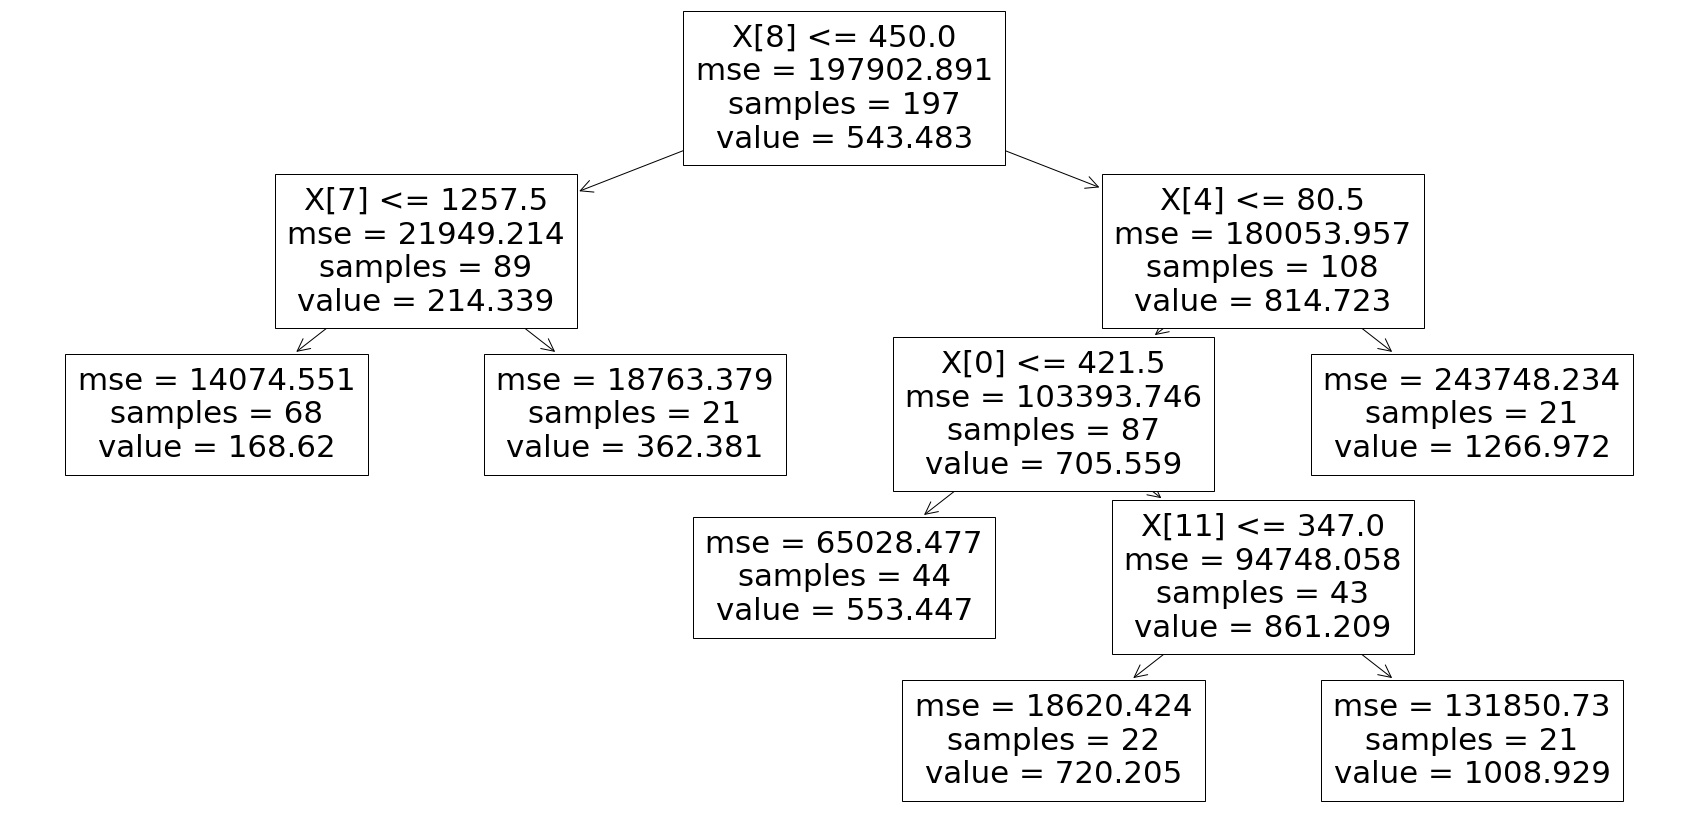

In [93]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned)

In [78]:
r2_score(y_test,y_pred)

0.2125625997604481

# RANDOM FOREST

In [82]:
import pandas as pd
hitters=pd.read_csv("Hitters.csv")
df=hitters.copy()
df=df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [10]:
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [84]:
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)


In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf_model=RandomForestRegressor(random_state=42)

In [88]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

## Prediction

In [89]:
rf_model.predict(X_test)[0:5]

array([ 740.62167,  895.99497, 1184.695  ,  139.65167,  634.75833])

In [91]:
y_pred=rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

345.00286717448006

In [92]:
r2_score(y_test,y_pred)

0.45016046218971983

## Model Tuning

In [100]:
rf_params = {"max_depth": list(range(1,5)),
              "max_features": [3,5,7],
              "n_estimators": [10,20,50]}

In [101]:
rf_model=RandomForestRegressor(random_state=42)

In [102]:
rf_cv_model=GridSearchCV(rf_model,rf_params, cv=10,n_jobs=-1)

In [103]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4], 'max_features': [3, 5, 7],
                         'n_estimators': [10, 20, 50]})

In [104]:
rf_cv_model.best_params_

{'max_depth': 3, 'max_features': 5, 'n_estimators': 50}

In [106]:
rf_tuned=RandomForestRegressor(max_depth=3,max_features=5,n_estimators=50)

In [108]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, max_features=5, n_estimators=50)

In [109]:
y_pred=rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

339.935131343114

In [110]:
r2_score(y_test,y_pred)

0.46619497561674816

In [111]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)

Text(0.5, 0, 'Değişken Önem düzeyleri')

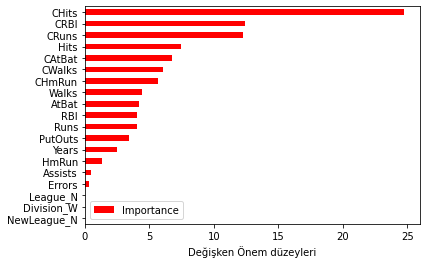

In [112]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="r")
plt.xlabel("Değişken Önem düzeyleri")

# Neural Network

In [2]:
import pandas as pd
hitters=pd.read_csv("Hitters.csv")
df=hitters.copy()
df=df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [4]:
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)


In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((197, 19), (66, 19), (197,), (66,))

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [10]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
from sklearn.neural_network import MLPRegressor

In [12]:
mlp_model=MLPRegressor(hidden_layer_sizes=(100,20),max_iter=10000, random_state=42).fit(X_train_scaled,y_train)
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20), max_iter=10000, random_state=42)

In [18]:
?mlp_model

In [13]:
mlp_model.n_layers_

4

In [13]:
mlp_model.n_iter_

6941

In [14]:
mlp_model.hidden_layer_sizes

(100, 20)

## Prediction

In [15]:
y_pred=mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

429.918461042957

In [16]:
r2_score(y_test,y_pred)

0.14618703319438386

## Model Tuning

In [ ]:
mlp_param = {"alpha": [0.1,0.01],
             "hidden_layer_sizes": [(20,20), (100,50,150)],
             "activation": ["relu","logistic"]}

mlp_cv_model = GridSearchCV(mlp_model, mlp_param, cv=5, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
